**One-hot encoding** transforms categorical features into a numerical format suitable for machine learning. It creates a new binary column for each unique category, indicating the presence (1) or absence (0) of that category for each data point. This is useful for nominal data where order doesn't matter.

DictVectorizer transforms dictionary objects (categorical feature: value) into one-hot encoded vectors.

In [ ]:
from sklearn.feature_extraction import DictVectorizer
X_dict = [{'interest': 'tech', 'occupation': 'professional'},
{'interest': 'fashion', 'occupation': 'student'},
{'interest': 'fashion','occupation':'professional'},
{'interest': 'sports', 'occupation': 'student'},
{'interest': 'tech', 'occupation': 'student'},
{'interest': 'tech', 'occupation': 'retired'},
{'interest': 'sports','occupation': 'professional'}]
dict_one_hot_encoder = DictVectorizer(sparse=False)
X_encoded = dict_one_hot_encoder.fit_transform(X_dict)
print(X_encoded)

[[0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [ ]:
print(dict_one_hot_encoder.vocabulary_)

{'interest=tech': 2, 'occupation=professional': 3, 'interest=fashion': 0, 'occupation=student': 5, 'interest=sports': 1, 'occupation=retired': 4}


In [ ]:
new_dict = [{'interest': 'sports', 'occupation': 'retired'}]
new_encoded = dict_one_hot_encoder.transform(new_dict)
print(new_encoded)

[[0. 1. 0. 0. 1. 0.]]


In [ ]:
print(dict_one_hot_encoder.inverse_transform(new_encoded))

[{'interest=sports': np.float64(1.0), 'occupation=retired': np.float64(1.0)}]


**Ordinal encoding** transforms a categorical feature with k values into a numerical feature with values from 1 to k, preserving the order or rank of the categories. For example, 'large', 'medium', 'small' can become 3, 2, 1. This differs from one-hot encoding, which does not preserve order. Pandas can be used to perform ordinal encoding.

In [ ]:
import pandas as pd
df = pd.DataFrame({'score': ['low',
'high',
'medium',
'medium',
'low']})
print(df)
mapping = {'low':1, 'medium':2, 'high':3}
df['score'] = df['score'].replace(mapping)
print(df)

    score
0     low
1    high
2  medium
3  medium
4     low
   score
0      1
1      3
2      2
3      2
4      1


/tmp/ipython-input-522165310.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['score'] = df['score'].replace(mapping)


## Classifying data with logistic regression

### Getting started with the logistic function

**Sigmoid**

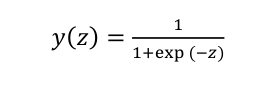

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(input):
  return 1.0/(1+np.exp(-input))

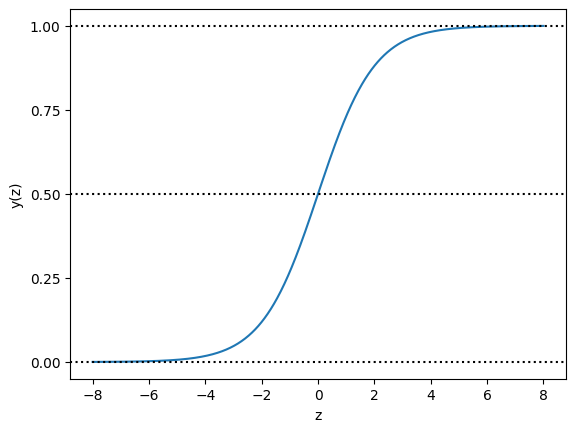

In [ ]:
z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.axhline(y=0, ls='dotted', color='k')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.axhline(y=1, ls='dotted', color='k')
plt.yticks([0.0, 0.25, 0.5, 0.75, 1.0])
plt.xlabel('z')
plt.ylabel('y(z)')
plt.show()

### Jumping from the logistic function to logistic regression

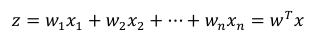


intercept / bias

image.png

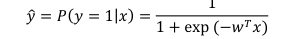

A logistic regression model learns weight vector w from training data to predict positive samples near 1 and negative samples near 0. The weights are optimized to minimize Mean Squared Error (MSE), which averages squared differences between true and predicted values across *m* samples.

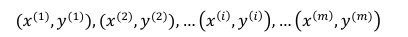

Logistic regression’s cost function J(w) uses MSE, where y(i) ∈ {0, 1}. However, MSE is non-convex for logistic regression, leading to multiple local optima and preventing convergence to a global optimum. Convex functions (like logistic loss) have a single global minimum, while non-convex ones (like MSE here) have suboptimal local minima.

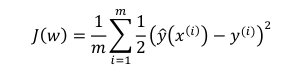


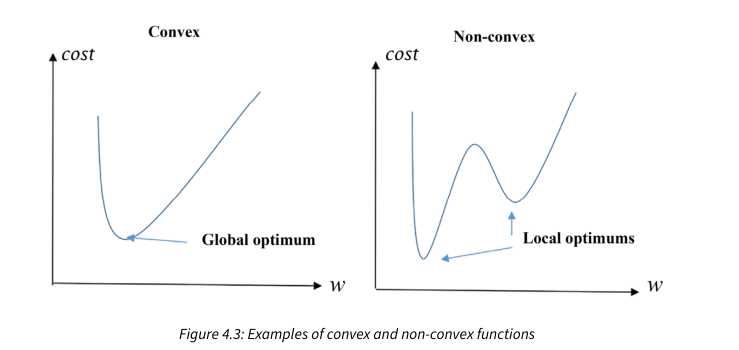



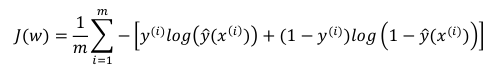

THE COST FUNCTION :
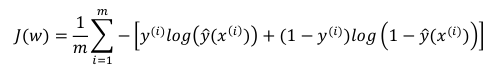

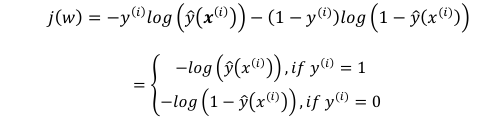

For the cost function when the true class is 1:
- If the model predicts 1 with high confidence, the cost is 0.
- If the predicted probability of 1 decreases, the cost increases.
- If the model predicts 0 (no chance of the positive class), the cost is infinitely high.

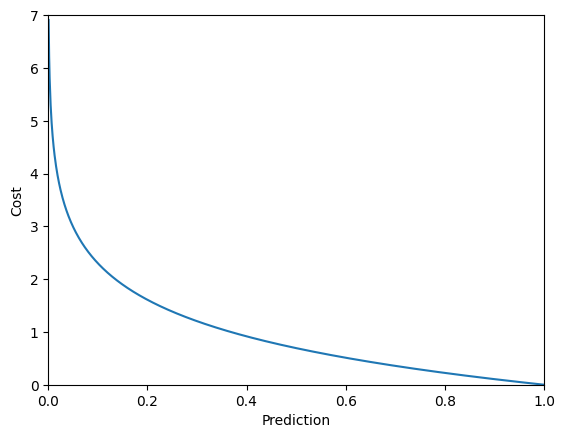

In [ ]:
y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

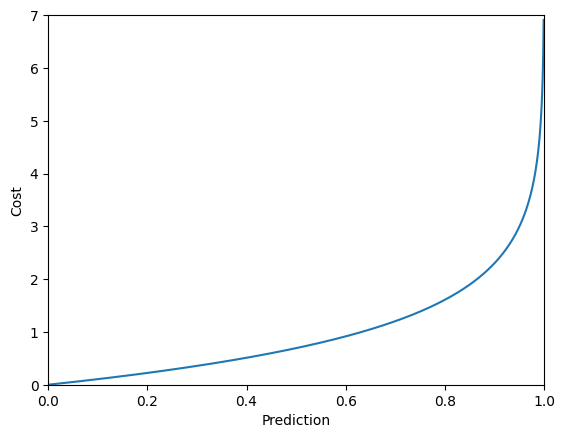

In [ ]:
y_hat = np.linspace(0.001, 0.999, 1000)
cost = -np.log(1 - y_hat)
plt.plot(y_hat, cost)
plt.xlabel('Prediction')
plt.ylabel('Cost')
plt.xlim(0, 1)
plt.ylim(0, 7)
plt.show()

### **Condensed Summary (50% Length)**  

**Key Advantages of Cross-Entropy Loss for Logistic Regression:**  
1. **Convexity** → Guarantees optimal weights.  
2. **Simplified Derivatives** → Gradient calculation reduces to \( (\hat{y}^{(i)} - y^{(i)})x_j^{(i)} \).  
3. **Log Loss** → Logarithmic terms penalize incorrect predictions sharply.  

**Cost Function (Log Loss):**  
\[
J(w) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)}) \right]
\]  

**Next Step:** Train the model by minimizing \( J(w) \) via gradient descent.  

*(Word count reduced by ~50%, retaining core concepts.)*